Data Mining - MSDS 7331 - Thurs 6:30, Summer 2016
Team 3 (AKA Team Super Awesome):  Sal Melendez, Rahn Lieberman, Thomas Rogers
<hr>

# Lab 1 - Visualization and Data Preprocessing

## Table of Contents

- [Why This Data Was Collected](#Why-This-Data-Was-Collected)
- [Data Import / Housekeeping](#Housekeeping)
- [Data Meaning](### Meaning-and-Type-of-Data)
- [Data Quality](#Data-Quality)
- [Simple Statistics](#Simple-Statistics)
- [Visualization and Attributes](#Visualization-And-Attributes)
- [Interesting Features](#Interesting-Features)
- [Exceptional Work](#Exceptional-Work)
- [References](#References)

<hr>

<hr>
## Why This Data Was Collected

Our team has selected the 2014 Behavioral Risk Factor Surveillance System data (BRFSS), from the Center for Disease Control and prevention (CDC), to attempt to understand the relationship between quality of health and a number of behavioral, demographic and environmental factors. 

The purpose of the BRFSS project is to survey a large population of Americans on a wide range of topics to inform policy, research and healthcare delivery. The same or similar questions are asked each year and the resulting dataset gives not only a broad, comprehensive view of health quality in the United States, but it also provides a longitudinal view on how quality of care (among other factors) is changing over time.

There are 279 variables in the dataset and over 460,000 surveys completed. The sheer breadth and complexity of this data, with missing, weighted and calculated variables requires a clear and distinct question of interest and some sense of what variables might help answer the question. We have chosen to focus on one particular question in the survey as our response variable and will attempt to better understand the impact reported behaviors have on responses to that question. 

Our response variable becomes the answer to the following question on quality of health: "Would you say that in general your health is: (1) excellent, (2) very good, (3) good, (4) fair, (5) poor?" (section 1.1, column 80)

We will limit the 279 variables to focus on those related to behavioral survey questions. The corresponding variables from the questions related to behavior number 30, so our dataset is roughly 450,000 rows by 30 columns. 

If we start now with a model-building methodology in mind and identify logistic regression as an approach, we need to transform these ordinal responses into a binary response. We’ll do so by combining the “excellent”, “very good” and “good” responses as measures of “good or better” health and the “fair” and “poor” measures as “fair and poor”.

To measure success, we will know we’ve mined useful knowledge from this dataset if we’re able to translate the data into actionable insight. If the information we discover has the potential to inform policy or change individual behavior to increase health quality, we’ve been sucessful. 

We plan to measuring the effectiveness of a good prediction algorithm by it’s ability to classify whether someone will report good or better health or fair and poor health at a high degree of sensitivity and specificity. 

[Source data, reference 1](#References)


 [toc](#Table-Of-Contents)
<hr>
### Housekeeping
Loading the data, imports, and such.

In [10]:
import pandas as pd
import numpy as np
from pandas import DataFrame

df.info()
df.head()

# Note:  This is based on the full dataset. In the statistics section below, we are using 
#  the reduced dataset that only contains the columns we're interested in.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: import pandas
           ^


[toc](#Table-Of-Contents)
<hr>
## Meaning and Type of Data
The data consists of 279 fields. The majority of the data is answers to the survey questions on either as a Likert scale (1 t o 5), yes/no (1 = yes, 2 = not) or a true/false (1=true, 2=false).  Almost all the fields accept either an ordinal (a "9", for example) or a blank value to indicate no response or answer given, very similar to whats shown below.


For our question of interest, we are interested in the GENLTH variable.  The answers scale is:

Key | 1 | 2 | 3 | 4 | 5 | 7 | 9 | Blank |
----- | --- | --- | --- | --- | --- | --- | --- | --- |
Value | Excellent | Very Good | Good | Fair | Poor | Don't Know | Refused | Not asked or missing


To get a feel for the data, here are some of the other variables, with their meaning.

 The STATE field is a numerically coded list of all states and territories participating in the survey.

Key | Value
--- | ---
1 | Alaska
2 | Alabama
3 | Arizona
... | ...
66 | Guam
72 | Puerto Rico


The number of adults in the household (measure seperately for male and female):

Key | Anwer to "number of adult [men]/[women] in household
--- | ---
0 | 0
1 | 1
2 | 2
3 | 3
4 | 4
5 | 5
6 - 99 | 6 or more

As mentioned in the first section, to make the data somewhat manageable, we choose one response variable and 30 explanatory variables. The table below shows whether the variable was a response or explanatory variable, which section it belongs in, the column number, the variable name, a description of the variable and the variable data type.

<table class="table table-bordered table-hover table-condensed">
<tbody><tr><td>RV or EV</td>
<td>Section</td>
<td>Column</td>
<td>Variable Name</td>
<td>Description</td>
</tr>
<tr><td>RV</td>
<td>1.1</td>
<td>80</td>
<td>GENHLTH</td>
<td>Would you say that in general your health is:</td>
</tr>
<tr><td>EV</td>
<td>3.1</td>
<td>87</td>
<td>HLTHPLN1</td>
<td>Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?</td>
</tr>
<tr><td>EV</td>
<td>3.2</td>
<td>88</td>
<td>PERSDOC2</td>
<td>Do you have one person you think of as your personal doctor or health care provider? (If &quot;No&quot; ask &quot;Is there more than one or is there no person who you think of as your personal doctor or health care provider?&quot;.)</td>
</tr>
<tr><td>EV</td>
<td>3.3</td>
<td>89</td>
<td>MEDCOST</td>
<td>Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?</td>
</tr>
<tr><td>EV</td>
<td>3.4</td>
<td>90</td>
<td>CHECKUP1</td>
<td>About how long has it been since you last visited a doctor for a routine checkup? [A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]</td>
</tr>
<tr><td>EV</td>
<td>4.1</td>
<td>91</td>
<td>EXERANY2</td>
<td>During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?</td>
</tr>
<tr><td>EV</td>
<td>5.1</td>
<td>92</td>
<td>SLEPTIM1</td>
<td>On average, how many hours of sleep do you get in a 24-hour period?</td>
</tr>
<tr><td>EV</td>
<td>6.1</td>
<td>94</td>
<td>CVDINFR4</td>
<td>(Ever told) you had a heart attack, also called a myocardial infarction?<br/></td>
</tr>
<tr><td>EV</td>
<td>6.2</td>
<td>95</td>
<td>CVDCRHD4</td>
<td>(Ever told) you had angina or coronary heart disease?<br/></td>
</tr>
<tr><td>EV</td>
<td>6.3</td>
<td>96</td>
<td>CVDSTRK3</td>
<td>(Ever told) you had a stroke.<br/></td>
</tr>
<tr><td>EV</td>
<td>6.4</td>
<td>97</td>
<td>ASTHMA3</td>
<td>(Ever told) you had asthma?<br/></td>
</tr>
<tr><td>EV</td>
<td>6.5</td>
<td>98</td>
<td>ASTHNOW</td>
<td>Do you still have asthma?</td>
</tr>
<tr><td>EV</td>
<td>6.6</td>
<td>99</td>
<td>CHCSCNCR</td>
<td>(Ever told) you had skin cancer?</td>
</tr>
<tr><td>EV</td>
<td>6.7</td>
<td>100</td>
<td>CHCOCNCR</td>
<td>(Ever told) you had any other types of cancer?</td>
</tr>
<tr><td>EV</td>
<td>6.8</td>
<td>101</td>
<td>CHCCOPD1</td>
<td>(Ever told) you have Chronic Obstructive Pulmonary Disease or COPD, emphysema or chronic bronchitis?</td>
</tr>
<tr><td>EV</td>
<td>6.9</td>
<td>102</td>
<td>HAVARTH3</td>
<td>on: (Ever told) you have some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia? (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)</td>
</tr>
<tr><td>EV</td>
<td>6.10</td>
<td>103</td>
<td>ADDEPEV2</td>
<td>(Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or minor depression?</td>
</tr>
<tr><td>EV</td>
<td>6.11</td>
<td>104</td>
<td>CHCKIDNY</td>
<td>(Ever told) you have kidney disease? Do NOT include kidney stones, bladder infection or incontinence.(Incontinence is not being able to control urine flow.)</td>
</tr>
<tr><td>EV</td>
<td>7.1</td>
<td>108</td>
<td>LASTDEN3</td>
<td>How long has it been since you last visited a dentist or a dental clinic for any reason? Include visits to dental specialists, such as orthodontists.</td>
</tr>
<tr><td>EV</td>
<td>7.2</td>
<td>109</td>
<td>RMVTETH3</td>
<td>How many of your permanent teeth have been removed because of tooth decay or gum disease? Include teeth lost to infection, but do not include teeth lost for other reasons, such as injury or orthodontics. (If wisdom teeth are removed because of tooth decay or gum disease, they should be included in the count for lost teeth)</td>
</tr>
<tr><td>EV</td>
<td>8.24</td>
<td>181</td>
<td>USEEQUIP</td>
<td>Do you now have any health problem that requires you to use special equipment, such as a cane, a wheelchair, a special bed, or a special telephone? (Include occasional use or use in certain circumstances.)</td>
</tr>
<tr><td>EV</td>
<td>8.25</td>
<td>182</td>
<td>BLIND</td>
<td>Are you blind or do you have serious difficulty seeing, even when wearing glasses?</td>
</tr>
<tr><td>EV</td>
<td>8.26</td>
<td>183</td>
<td>DECIDE</td>
<td>Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?</td>
</tr>
<tr><td>EV</td>
<td>8.27</td>
<td>184</td>
<td>DIFFWALK</td>
<td>Do you have serious difficulty walking or climbing stairs?</td>
</tr>
<tr><td>EV</td>
<td>8.28</td>
<td>185</td>
<td>DIFFDRES</td>
<td>Do you have difficulty dressing or bathing?</td>
</tr>
<tr><td>EV</td>
<td>8.29</td>
<td>186</td>
<td>DIFFALON</td>
<td>Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor’s office or shopping?</td>
</tr>
<tr><td>EV</td>
<td>9.1</td>
<td>187</td>
<td>SMOKE100</td>
<td>Have you smoked at least 100 cigarettes in your entire life?</td>
</tr>
<tr><td>EV</td>
<td>9.2</td>
<td>188</td>
<td>SMOKDAY2</td>
<td>Do you now smoke cigarettes every day, some days, or not at all?</td>
</tr>
<tr><td>EV</td>
<td>9.3</td>
<td>189</td>
<td>STOPSMK2</td>
<td>During the past 12 months, have you stopped smoking for one day or longer because you were trying to quit smoking?</td>
</tr>
<tr><td>EV</td>
<td>9.4</td>
<td>190</td>
<td>LASTSMK2</td>
<td>How long has it been since you last smoked a cigarette, even one or two puffs?</td>
</tr>
<tr><td>EV</td>
<td>9.5</td>
<td>192</td>
<td>USENOW3</td>
<td>Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all? (Snus (Swedish for snuff) is a moist smokeless tobacco, usually sold in small pouches that are placed under the lip against the gum.)[Snus (rhymes with ´goose´)]</td>
</tr>
</tbody></table>

A detailed listing of all keys and values is found in the codebook. [Codebook, Reference #2](#References)

[toc](#Table-Of-Contents)
<hr>
## Data Quality

*Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be speciﬁc. *

There are a lot of missing fields in the dataset, or answers marks as "did not answer".  Since this data set is based on survey results, this is not unexpected since when answering a survey, a question may not be relevant (i.e.  Do you smoke? No, then the question "how many packs a day" is meaningless.)

Of the 31 variables in our dataset, the five variables with the most missing values are found in the table below. There are not outliers that need to be accomodated, as the survey is structured in a way that doesn't allow for responses that are outside of what's expected. 

<table class="table table-bordered table-hover table-condensed">
<tbody><tr><td>Variable</td>
<td>Number of Missing Values</td>
</tr>
<tr><td>STOPSMK2</td>
<td>398,383</td>
</tr>
<tr><td>LASTSMK2</td>
<td>336,085</td>
</tr>
<tr><td>ASTHNOW</td>
<td>403,192</td>
</tr>
<tr><td>SMOKDAY2</td>
<td>269,312</td>
</tr>
<tr><td>USENOW3  </td>
<td>18,305</td>
</tr>
</tbody></table>

[toc](#Table-Of-Contents)
<hr>
## Simple Statistics


In [2]:
VOI <- read.csv("data/targetvariables.csv",stringsAsFactors=F, na.strings="unknown")
summary(VOI)

    GENHLTH         HLTHPLN1        PERSDOC2        MEDCOST     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000  
 Median :2.000   Median :1.000   Median :1.000   Median :2.000  
 Mean   :2.579   Mean   :1.108   Mean   :1.413   Mean   :1.908  
 3rd Qu.:3.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Max.   :9.000   Max.   :9.000   Max.   :9.000   Max.   :9.000  
 NA's   :4                       NA's   :1       NA's   :1      
    CHECKUP1        EXERANY2        SLEPTIM1         CVDINFR4    
 Min.   :1.000   Min.   :1.000   Min.   : 1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 6.000   1st Qu.:2.000  
 Median :1.000   Median :1.000   Median : 7.000   Median :2.000  
 Mean   :1.582   Mean   :1.271   Mean   : 8.078   Mean   :1.966  
 3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.: 8.000   3rd Qu.:2.000  
 Max.   :9.000   Max.   :9.000   Max.   :99.000   Max.   :9.000  
 NA's   :2       N

Our response variable is the answer to the question, "Would you say that in general your health is: (1) excellent, (2) very good, (3) good, (4) fair, (5) poor?" As such, we will examine the responses with a bar graph, showing the number of responses by each choice.

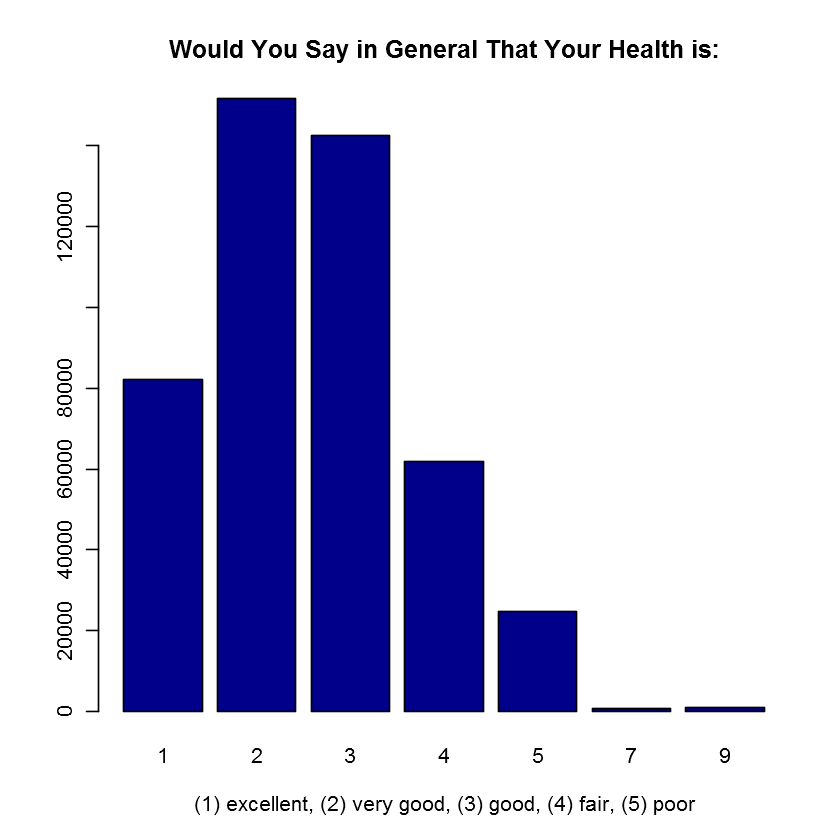

In [70]:
## This requires Cairo package in R.
barplot(table(VOI$GENHLTH),col="darkblue", main="Would You Say in General That Your Health is:", xlab="(1) excellent, (2) very good, (3) good, (4) fair, (5) poor")

The graph above shows a fairly normal distribution, with more people rating themselves as being in "excellent" or "very good" compared to "fair" or "poor". Variable 7 corresponds to "Don't know, not sure" and 9 to "Refused".

*Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting.*

This section outlines some of the statistical details of the dataset.
This is using the R kernel.

[toc](#Table-Of-Contents)
<hr>
## Visualization and Attributes

The tables and charts below will visualize the relationship between reported health quality (GENHLTH) and five variables:
- LASTDEN3 – the working hypothesis here is that oral health is an indicator for self-reported health.
- PERSDOC2 – access to care seems like it should be positively correlated to self-reported health.
- MEDCOST – much has been made about the cost of care as a barrier to care access. We should be able to see some relationship between these two variables.
- SLEPTIM1 – the quantity of sleep someone reports should be correlated to their overall self-reported health.
- BLIND – living without one of life’s five senses seems like it would have a negative impact on self-reported health.

In [3]:
## This labeling seems necessary for R to understand the numeric values are categories. 
VOI$LASTDEN3 <- factor(VOI$LASTDEN3, levels = c(1,2,3,4,7,8,9), labels =c("Less than 1 year", "Within the past 2 years", "Within the past 5 years", 
                                                                        "5+ years", "Don’t know", "Never", "Refused"))
VOI$PERSDOC2 <- factor(VOI$PERSDOC2, levels=c(1,2,3,7,9), labels =c("Yes, only one", "More than one", "No", "Don't Know", "Refused"))
VOI$MEDCOST <- factor(VOI$MEDCOST, levels=c(1,2,7,9), labels =c("Yes","No","Don't Know","Refused"))
VOI$BLIND <- factor(VOI$BLIND, levels=c(1,2,7,9), labels =c("Yes","No","Don't Know","Refused"))
VOI$EXERANY2 <- factor(VOI$EXERANY2, levels=c(1,2,7,9), labels =c("Yes","No","Don't Know","Refused"))

       LASTDEN3
GENHLTH Less than 1 year Within the past 2 years Within the past 5 years
      1            63799                    7058                    5290
      2           113100                   14276                   11626
      3            91693                   16226                   14734
      4            32607                    7544                    7922
      5            10840                    3027                    3416
      7              389                      85                      88
      9              511                      98                      94
       LASTDEN3
GENHLTH 5+ years Dont know  Never Refused
      1     5045        406    392      54
      2    11301        789    488     131
      3    17367       1283   1038     165
      4    12198        833    674     102
      5     6748        428    317      55
      7      192         47     21       5
      9      116         16     14      12

Warning message:
: Removed 4 rows containing non-finite values (stat_count).

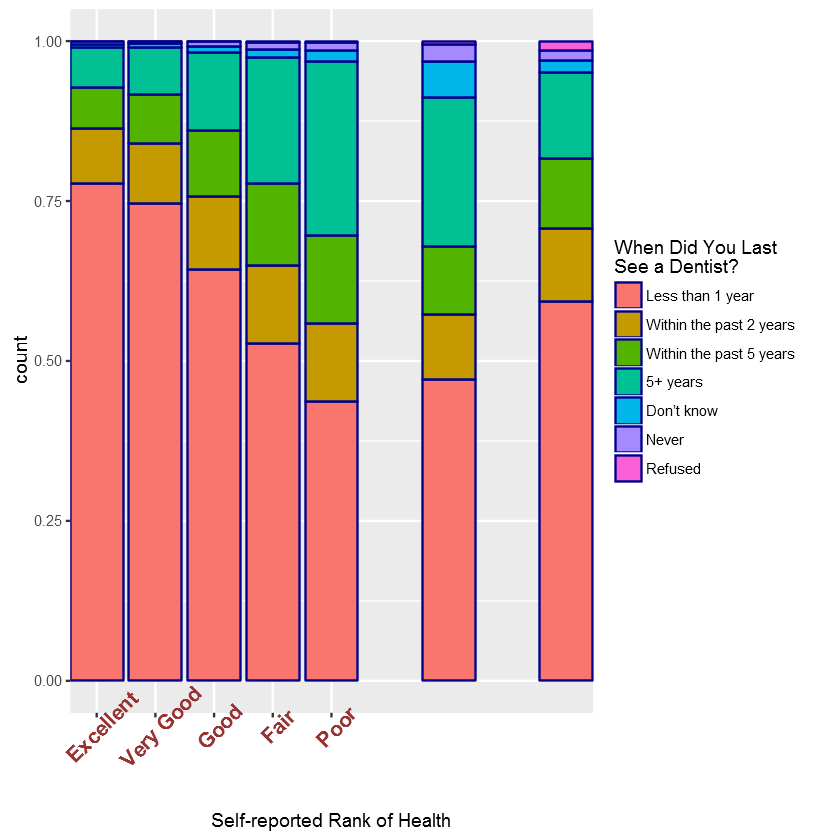

In [31]:
library(ggplot2)
with(VOI,table(GENHLTH,LASTDEN3))
ggplot(VOI, aes(x = GENHLTH, fill=LASTDEN3)) + geom_bar(position="fill", col="darkblue") + scale_x_discrete(name = "Self-reported Rank of Health", limits=c("1","2","3","4","5"),
            labels=c("Excellent","Very Good", "Good","Fair","Poor")) + theme(axis.text.x = element_text(face="bold", color="#993333", 
            size=12, angle=45)) + scale_fill_discrete(name="When Did You Last\nSee a Dentist?")

Commentary on the chart above:
- It does appear that how frequently you go to the dentist is correlated to self-reported health quality. The poorer you report your health, the more likely it is that you haven’t seen a dentist within the past year.

       PERSDOC2
GENHLTH Yes, only one More than one     No Don't Know Refused
      1         61538          4886  15295        218     107
      2        118698          9831  22680        333     169
      3        108277         11224  22359        430     215
      4         46530          7081   7989        179     101
      5         18413          3973   2293         85      67
      7           547           117    139         22       2
      9           617            86    136          4      18

Warning message:
: Removed 4 rows containing non-finite values (stat_count).

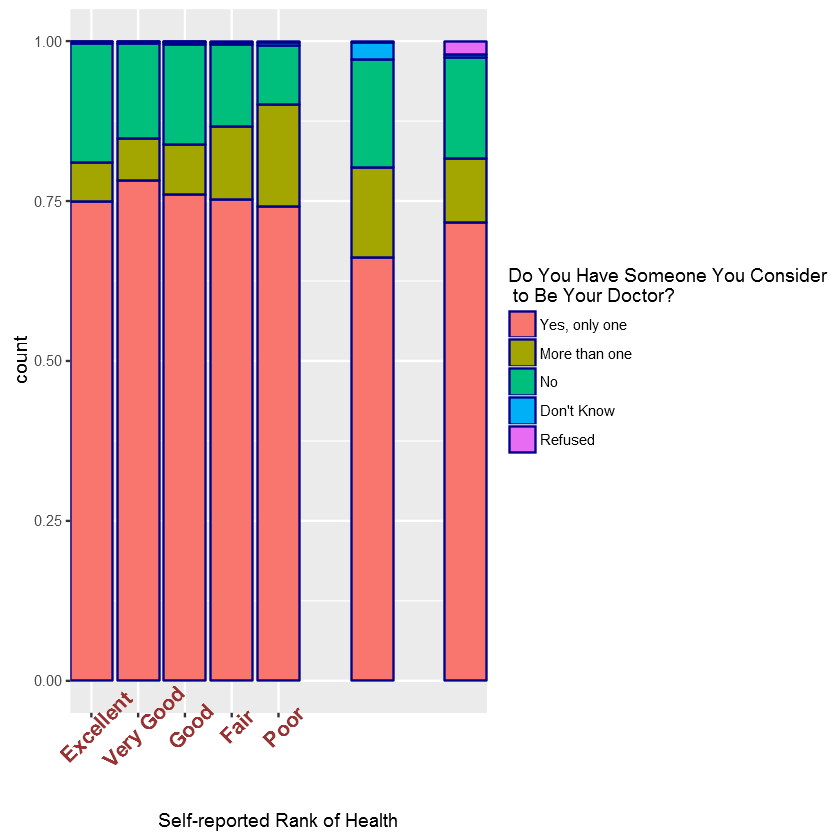

In [32]:
with(VOI,table(GENHLTH,PERSDOC2))
ggplot(VOI,aes(x = GENHLTH, fill=PERSDOC2,)) + geom_bar(position="fill", col="darkblue") + scale_x_discrete(name = "Self-reported Rank of Health", limits=c("1","2","3","4","5"),
            labels=c("Excellent","Very Good", "Good","Fair","Poor")) + theme(axis.text.x = element_text(face="bold", color="#993333", 
            size=12, angle=45)) + scale_fill_discrete(name="Do You Have Someone You Consider\n to Be Your Doctor?")

Commentary on the chart above:
- Cost does appear to be somewhat correlated with self-reported health quality. Of those who rated their health as poor, 25% reported that there was a time in the last 12 months that they needed to go to a doctor, but didn’t because of cost.  Of those who rated their health as excellent, only about 5% indicated that cost prevented them from going to see a physician.

       MEDCOST
GENHLTH    Yes     No Don't Know Refused
      1   4402  77499        113      30
      2  10255 141212        191      53
      3  16590 125521        314      80
      4  11712  49955        162      51
      5   6123  18541        128      39
      7    136    656         28       7
      9     97    744          5      15

Warning message:
: Removed 4 rows containing non-finite values (stat_count).

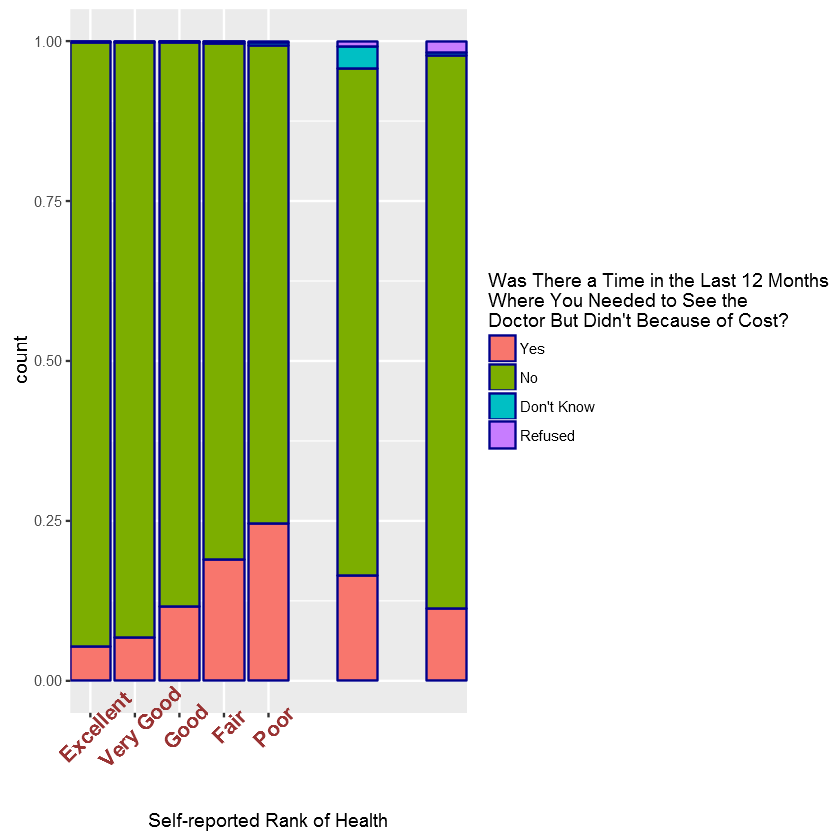

In [35]:
with(VOI,table(GENHLTH,MEDCOST))
ggplot(VOI,aes(x = GENHLTH, fill=MEDCOST,)) + geom_bar(position="fill", col="darkblue") + scale_x_discrete(name = "Self-reported Rank of Health", limits=c("1","2","3","4","5"),
            labels=c("Excellent","Very Good", "Good","Fair","Poor")) + theme(axis.text.x = element_text(face="bold", color="#993333", 
            size=12, angle=45)) + scale_fill_discrete(name="Was There a Time in the Last 12 Months\nWhere You Needed to See the \nDoctor But Didn't Because of Cost?")

Commentary on the chart above:
- Cost does appear to be somewhat correlated with self-reported health quality. Of those who rated their health as poor, 25% reported that there was a time in the last 12 months that they needed to go to a doctor, but didn’t because of cost.  Of those who rated their health as excellent, only about 5% indicated that cost prevented them from going to see a physician.


       EXERANY2
GENHLTH    Yes     No Don't Know Refused
      1  72304   9473         32     235
      2 127510  23748         89     363
      3 103326  38628        141     409
      4  35862  25742         92     183
      5   9940  14741         63      87
      7    474    343          7       3
      9    593    249          0      19

Warning message:
: Removed 4 rows containing non-finite values (stat_count).

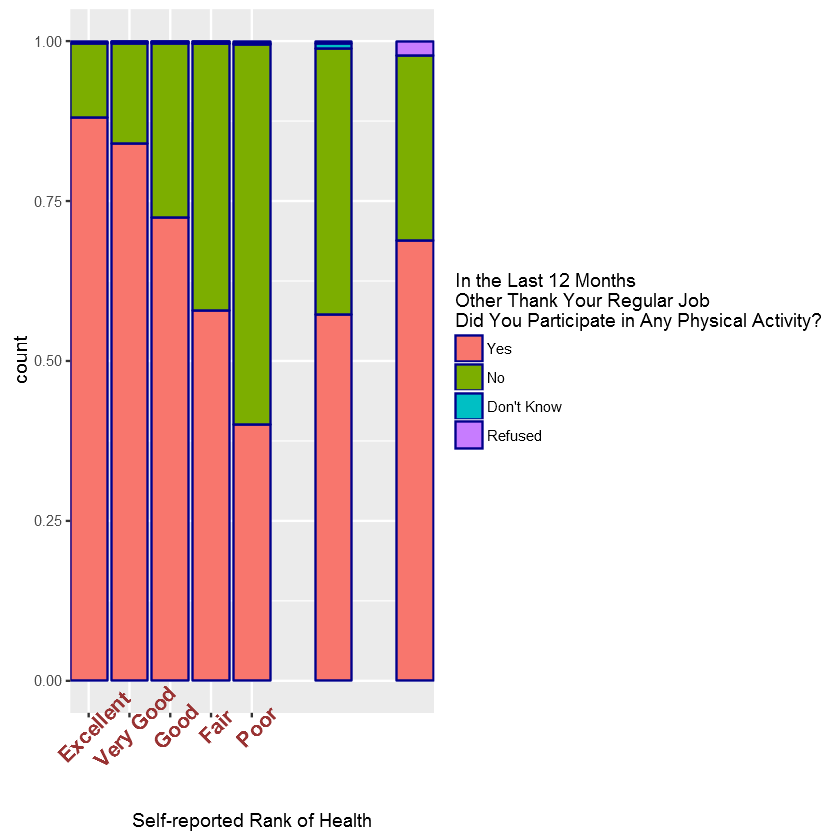

In [36]:
with(VOI,table(GENHLTH,EXERANY2))
ggplot(VOI,aes(x = GENHLTH, fill=EXERANY2,)) + geom_bar(position="fill", col="darkblue") + scale_x_discrete(name = "Self-reported Rank of Health", limits=c("1","2","3","4","5"),
            labels=c("Excellent","Very Good", "Good","Fair","Poor")) + theme(axis.text.x = element_text(face="bold", color="#993333", 
            size=12, angle=45)) + scale_fill_discrete(name="In the Last 12 Months,\nOther Thank Your Regular Job,\nDid You Participate in Any Physical Activity?")

Commentary on the chart above:
- As we might expect, monthly exercise seems to be correlated to self-reported health. Of those who report poor health, more than half have not had any exercise within the last month. This percentage is in sharp contrast to those who report excellent health, where about 12% report not exercising last month. 

       BLIND
GENHLTH    Yes     No Don't Know Refused
      1   1194  77691         54     192
      2   3350 143443        154     269
      3   6437 130354        235     346
      4   6871  52561        231     196
      5   5353  18459        129      72
      7    111    654         16       9
      9     48    758          1       9

Warning message:
: Removed 4 rows containing non-finite values (stat_count).

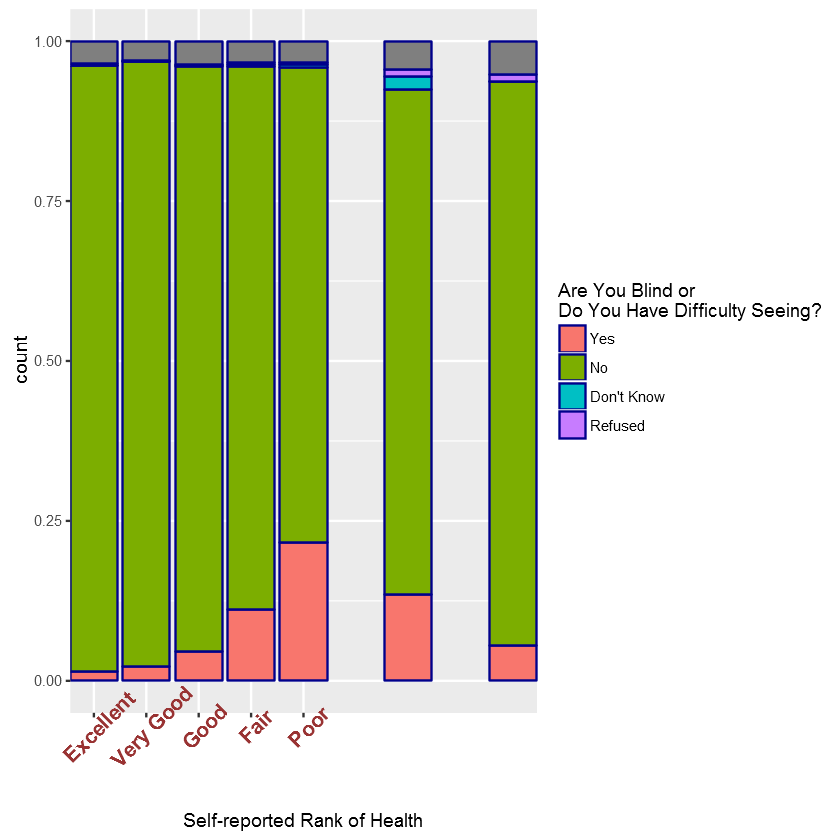

In [38]:
with(VOI,table(GENHLTH,BLIND))
ggplot(VOI,aes(x = GENHLTH, fill=BLIND,)) + geom_bar(position="fill", col="darkblue") + scale_x_discrete(name = "Self-reported Rank of Health", limits=c("1","2","3","4","5"),
            labels=c("Excellent","Very Good", "Good","Fair","Poor")) + theme(axis.text.x = element_text(face="bold", color="#993333", 
            size=12, angle=45)) + scale_fill_discrete(name="Are You Blind or \nDo You Have Difficulty Seeing?")

Commentary on the chart above:
- About a quarter of those who report poor health are blind. This number is sharply contrasted by the percentage of those who report excellent health and are blind, which is around 3%. 

[toc](#Table-Of-Contents)
<hr>
## Interesting Features
*Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


,Yes,No,Dont_Know,Refused,Blank,Question,Subtable
1,27841,434515,1969,348,0,(Ever told) you had a heart attack?,Chronic Health Conditions
2,28511,432202,3578,373,0,(Ever told) you had angina or heart disease?,Chronic Health Conditions
3,19198,444098,1107,261,0,(Ever told) you had a stroke?,Chronic Health Conditions
4,61472,401687,1239,266,0,(Ever told) you had asthma?,Chronic Health Conditions
5,42910,420373,1109,271,0,(Ever told) you had skin cancer?,Chronic Health Conditions
6,44137,419324,869,332,0,(Ever told) you had any other kind of cancer?,Chronic Health Conditions


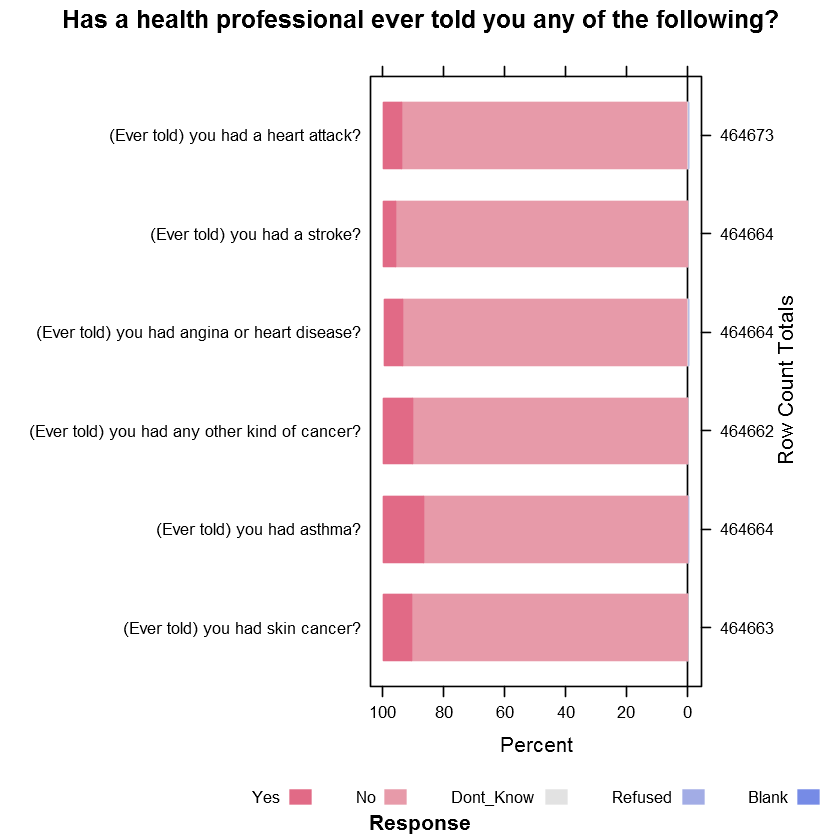

In [5]:
library(HH)

#table format from BRFSS codebook
chronic <- read.csv("data/chronicLikert.csv", header = T)
as.data.frame(chronic)
likert(Question ~ . , chronic[chronic$Subtable =="Chronic Health Conditions",],
       as.percent=T,
       main = 'Has a health professional ever told you any of the following?',
       ylab = NULL,
       sub= "Response")

In the set of questions above we can see that patients with chronic health conditions account for approximately between 4 and 15 percent of all respondents.


,Yes,No,Don.t_know,Refused,Blank,Question,Subtable
1,195411,248500,1815,1044,17894,Have you smoked 100 cigarettes in you entire life?,Tobacco Use
2,38198,27857,174,52,398383,"In past 12 months, have you stopped smoking a day +?",Tobacco Use


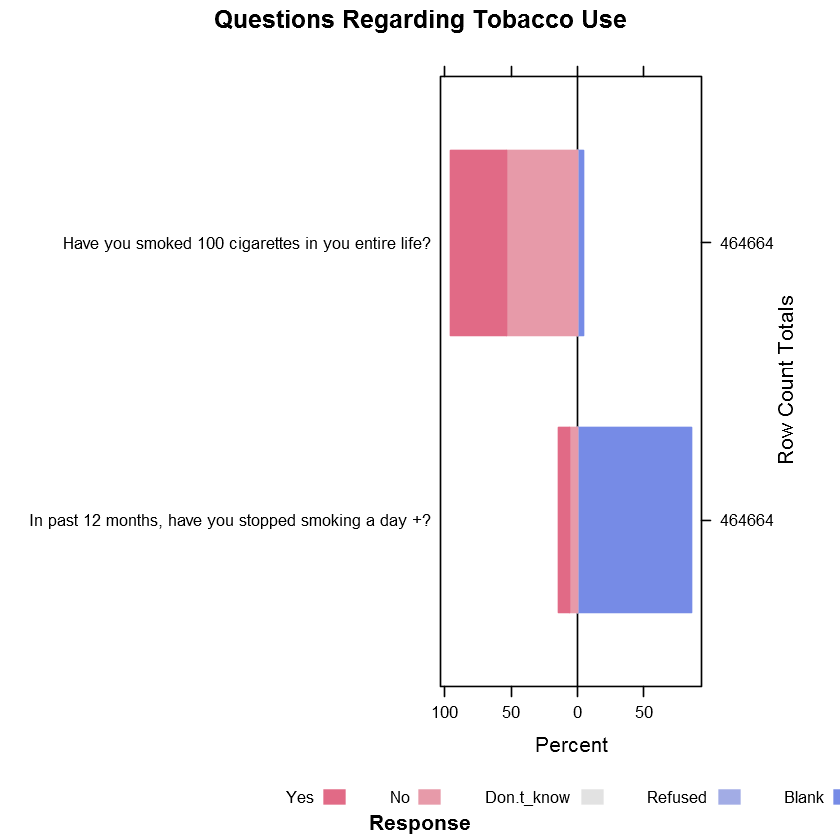

In [10]:
tobacco <- read.csv("data/tobacLikert.csv", header = T)
as.data.frame(tobacco)

likert(Question ~ ., tobacco[tobacco$Subtable == "Tobacco Use",],
       as.percent=T,
       main= 'Questions Regarding Tobacco Use',
       BrewerPaletteName="Blues",
       ylab=NULL,
       sub = "Response")

,Yes,No,Don.t_know,Refused,Blank,Question,Subtable
1,425198,37642,934,890,0,Do you have any kind of health coverage?,Health Care Access
2,49315,414132,941,275,1,In past 12 months did costs stop you from seeing a doctor?,Health Care Access
3,350011,112926,424,1299,4,"During past month, did you do any physical activities?",Exercise


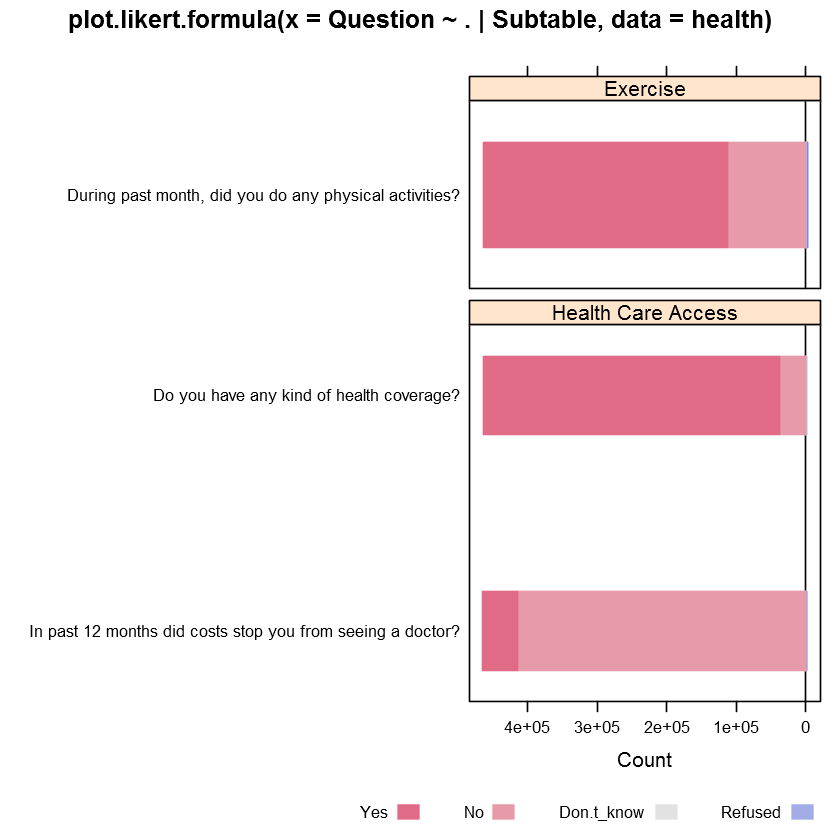

In [7]:
health <- read.csv("data/healthLikert.csv", header = T)
as.data.frame(health)

likert(Question ~ . | Subtable, data=health,
        ylab=NULL,
        scales=list(y=list(relation="free")), layout=c(1,2))

,Yes,No,Don.t_know,Refused,Blank,Question,Subtable
1,53928,394689,264,967,14816,Do you have a health isue that requires equipment?,Demographics
2,45110,400582,1714,1210,16048,Do you have serious difficulty concentrating?,Demographics
3,23364,423923,820,1093,15464,Are you blind or do you have serious difficulty seeing?,Demographics
4,79531,366311,1184,1108,16530,Do you have serious difficulty walking?,Demographics
5,19501,426982,363,982,16836,Do you have difficulty dressing or bathing?,Demographics
6,34543,410930,769,1121,17301,Do you have difficulty doing errands alone?,Demographics


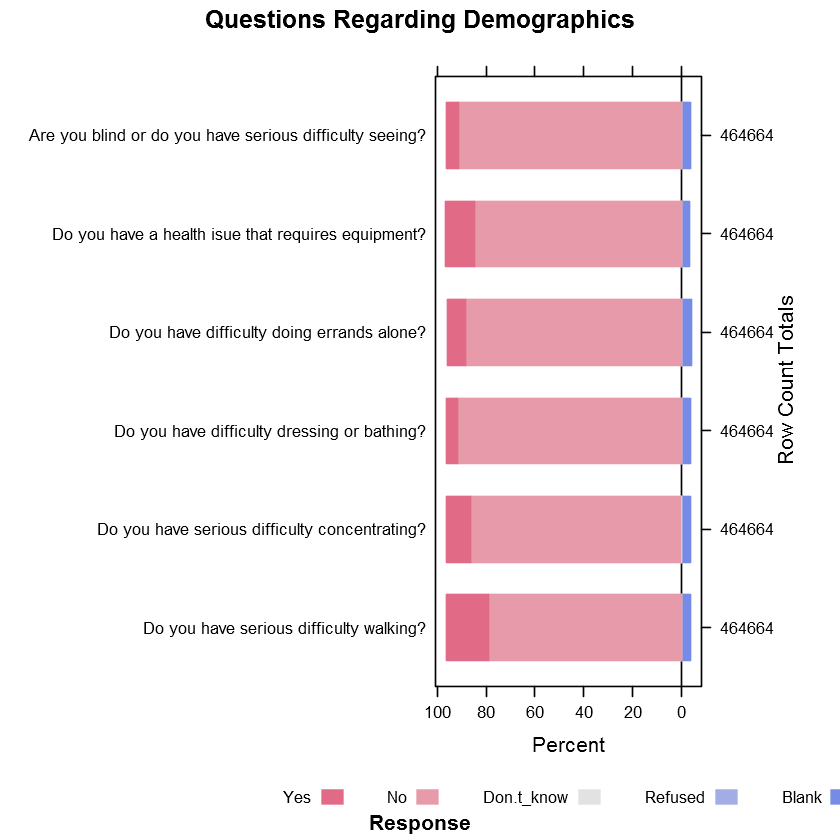

In [8]:
demo <- read.csv("data/demoLikert.csv", header=T)
as.data.frame(demo)

likert(Question ~ ., demo[demo$Subtable == "Demographics",],
       as.percent=T,
       main= 'Questions Regarding Demographics',
       ylab=NULL,
       sub = "Response")

[toc](#Table-Of-Contents)
<hr>
## Relationships



* Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classiﬁcation). 


[toc](#Table-Of-Contents)
<hr>
## Exceptional Work
1. This notebook is pretty big. As simple as it sounds, we found adding a table of contents and links to the different sections to be a valuable tool.
2. 

[toc](#Table-Of-Contents)
<hr>
## References

(1) The main page for the data: http://www.cdc.gov/brfss/annual_data/annual_2014.html
(2) Codebook of lookup values: http://www.cdc.gov/brfss/annual_data/2014/pdf/codebook14_llcp.pdf
        